# Банки — Сегментация пользователей по потреблению

**Описание исследования:**

Главной задачей станет сегментация пользователей по потреблению. Анализ покажет, как клиенты пользуются нашими услугами, а так же поможет нам составить портрет клиентов, которые склонны уходить из банка. «Метанпромбанк» — деньги не пахнут!

**Цель исследования:**

Найти причину, по которой происходит отток клиентов банка и дать рекомендации менеджеру по удержания клиентов.

**Задача исследования:**

Проанализируйте клиентов регионального банка и сегментируйте пользователей по количеству потребляемых продуктов, обращая особое внимание на отток.

**Этапы для решения поставленной задачи:**

- Изучить исходные данные
- Провести подготовку данных
- Провести исследовательский анализ данных
- Сегментировать пользователей на основе данных о количестве потребляемых продуктов
- Сформулировать и проверить статистические гипотезы
- Сформулировать выводы и написать рекомендации заказчику

## Материалы:

Презентация: https://disk.yandex.ru/d/h7IQ_J8SpJyfeA

Дашборд: https://public.tableau.com/views/dash_Yndx_Bank/dashboard?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

## Описание данных:

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

**Колонки:**

`userid` — идентификатор пользователя;

`score` — баллы кредитного скоринга;

`City` — город;

`Gender` — пол;

`Age` — возраст;

`Equity` — приблизительная оценка собственности клиента;

`Balance` — баланс на счёте;

`Products` — количество продуктов, которыми пользуется клиент;

`CreditCard` — есть ли кредитная карта;

`Loyalty` — активный клиент;

`estimated_salary` — заработная плата клиента;

`Churn` — ушёл или нет.

### Изучение исходных данных

#### Импорт необходимых библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats as st
import numpy as np

warnings.filterwarnings('ignore')

#### Создание датафрейма с исходными данными

In [2]:
try:
    bank_scrooge = pd.read_csv('/datasets/bank_scrooge.csv')
except:
    bank_scrooge = pd.read_csv('bank_scrooge.csv')

#### Обзор данных

In [3]:
bank_scrooge.info() # вывод информации о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [4]:
display(bank_scrooge.head()) # предварительный просмотр

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [5]:
print(bank_scrooge.isna().sum()) # проверка на пропуски в данных

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64


#### Вывод:

На этапе ознакомления с данными было обнаружено, что названия столбцов не соответствуют змеиному регистру, в столбцах `age` и `balance` имеются пропуски в данных. В несколько столбцах необходимо изменить тип, чтобы он соответствовал данным. Необходимо провести подготовку данных для дальнейшего исследовательского анализа и проверить данные на наличие дубликатов. В данных могут содержаться выбросы, которые повлияют на результаты исследования, необходимо их проверить.

### Подготовка данных

#### Изменение названий столбцов

In [6]:
bank_scrooge = bank_scrooge.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'salary'})
display(bank_scrooge.columns)

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'salary', 'churn'],
      dtype='object')

#### Обработка пропусков в данных

In [7]:
bank_scrooge.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
salary              0
churn               0
dtype: int64

Можно заметить, что в столбцах `age` и `balance` имееются пропуски. 

Посмотрим на строки, в которых содержатся пропуски. Начнем со столбца `age`:

In [8]:
bank_scrooge[bank_scrooge['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


Так как корректно определить возраст мы не сможем, в таком случае можно спокойно удалить строки, так как они составляют меньше 1% от общего объема данных. 

Посмотрим пропуски в столбце `balance`:

In [9]:
bank_scrooge[bank_scrooge['balance'].isna()].head(15)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
21,177415,896.0,Рыбинск,Ж,47.0,0,NaN,1,0,0,225060.35,0
30,155730,946.0,Ярославль,Ж,47.0,0,NaN,2,1,1,660015.85,0
34,205226,944.0,Ярославль,М,35.0,0,NaN,2,1,1,239843.39,0
39,173175,924.0,Рыбинск,Ж,51.0,0,NaN,1,1,1,248844.47,0
43,228585,956.0,Ростов,М,41.0,0,NaN,1,1,0,115117.10,0


Можно отметить, что пропуски в столбце с балансом на счете наблюдается в большинстве случаев у клиентов с нулевой приблизительной оценкой собственности. Так как объем пропусков составляет около 20% от общего объема, заменим пропуски на нули, чтобы они не мешали в дальнейшем проводить обработку выбросов.

Посмотрим на распределение пропусков в столбце `balance`:

In [10]:
bank_scrooge.query('balance.isna()').groupby('city')['city'].count()

city
Ростов        235
Рыбинск       593
Ярославль    1467
Name: city, dtype: int64

Пропуски в данных присутствуют в трех городах. Посмотрим на значение в столбце `churn`:

In [11]:
bank_scrooge.query('balance.isna()').groupby('churn')['churn'].count()

churn
0    2282
1      13
Name: churn, dtype: int64

В строках с пропусками значений есть клиенты как ушедшие, так и оставшиеся в банке, а наличие/отсутствие остатка не связано churn=1, то есть пропуск не является признаком оттока, так как всего 13 клиентов с пропусков в столбце `balance` ушли. Посмотрим, есть ли нулевые балансы:

In [12]:
#проверяем, есть ли нулевые остатки в поле `balance`
bank_scrooge.query('balance == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
3900,179831,730.0,Ярославль,М,18.0,0,0.0,2,1,1,64548.33,0
6757,148456,813.0,Ярославль,М,20.0,2,0.0,2,1,0,23876.51,0


Нулевые балансы встречаются всего лишь 2 раза. Нельзя точно определить, чем заменять пропуски, поэтому оставим их без изменения для недопущения искажения дальнейшего анализа.

Обработаем пропуски в столбце `age`:

In [13]:
bank_scrooge['age'] = bank_scrooge['age'].fillna(0)
bank_scrooge = bank_scrooge[bank_scrooge['age'] != 0]
print('Количество пропусков:', bank_scrooge['age'].isna().sum())

Количество пропусков: 0


#### Изменение типов данных

In [14]:
bank_scrooge['user_id'] = bank_scrooge['user_id'].astype('object')
bank_scrooge['score'] = bank_scrooge['score'].astype('int')
bank_scrooge['age'] = bank_scrooge['age'].astype('int')

bank_scrooge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   object 
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  salary         9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1013.0+ KB


#### Обработка дубликатов

Проверим данные на наличие дубликатов:

In [15]:
print('Количество явных строк дубликатов в bank_scrooge:', bank_scrooge.duplicated().sum())
print('Количество дубликатов в столбце user_id:', bank_scrooge['user_id'].duplicated().sum())

Количество явных строк дубликатов в bank_scrooge: 0
Количество дубликатов в столбце user_id: 50


Мы нашли 50 дубликатов в столбце `user_id`, можно на них посмотреть:

In [16]:
bank_scrooge[bank_scrooge['user_id'].duplicated()].head(3)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
1583,190253,726,Ярославль,М,49,0,NaN,1,1,1,177700.78,0
1837,210662,896,Рыбинск,Ж,37,0,NaN,2,0,0,90916.04,0
2138,131419,739,Рыбинск,Ж,37,3,1307941.65,3,0,0,103867.47,0


In [17]:
bank_scrooge.query('user_id == 190253 | user_id == 131419 | user_id == 220816').sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
904,131419,934,Ярославль,М,35,5,2348335.95,2,0,0,217105.13,1
2138,131419,739,Рыбинск,Ж,37,3,1307941.65,3,0,0,103867.47,0
231,190253,823,Рыбинск,М,37,4,373348.39,2,0,1,131947.92,1
1583,190253,726,Ярославль,М,49,0,NaN,1,1,1,177700.78,0
1740,220816,840,Ярославль,Ж,41,3,1193287.13,2,1,1,76434.94,1
2302,220816,934,Рыбинск,Ж,74,5,1294285.39,3,1,0,95606.80,0


Можно заметить, что ID пользователей переприсваиваются, если клиенты уходят, так как в столбце `churn` у клиентов с одним ID разные значения. Это можно считать правдой, значит обрабатывать эти дубликаты не стоит, так как они ими не являются.

#### Обработка выбросов

Построим диаграмму размаха, чтобы определить выбросы. Возьмем для проверки столбцы с возрастом клиента (`age`), балансом на счете (`balance`), зарплатой (`salary`) и баллами кредитного скоринга (`score`), так как они в первую очередь необходимы для дальнейшего исследования:

<AxesSubplot:xlabel='age'>

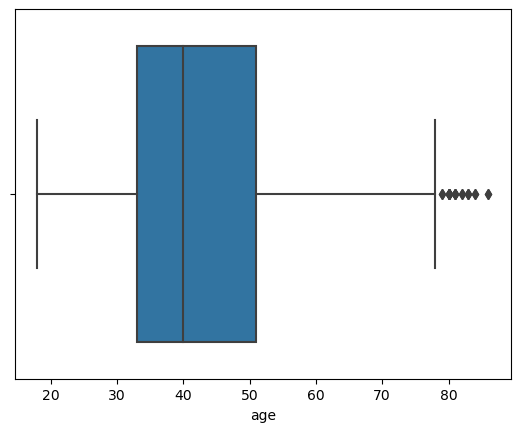

In [18]:
sns.boxplot(x='age', data=bank_scrooge)

Можно заметить, что клиенты старше 77 лет считаются аномальными. Необходимо посмотреть, какой процент они составляют от общего объема:

In [19]:
print('Количество клиентов старше 77 лет:', len(bank_scrooge.query('age > 77')))
print('Процент от общего объема:', (len(bank_scrooge.query('age > 77'))/len(bank_scrooge['age']))*100)

Количество клиентов старше 77 лет: 28
Процент от общего объема: 0.28072989773410867


Такие клиенты составляют меньше 1% от общего числа, поэтому мы можем спокойно их обработать.

In [20]:
bank_scrooge = bank_scrooge.query('age <= 77')

Проверим выбросы в столбце `balance`:

In [21]:
bank_scrooge['balance'].describe()

count    7.676000e+03
mean     8.274949e+05
std      1.982627e+06
min      0.000000e+00
25%      2.955266e+05
50%      5.242251e+05
75%      9.797239e+05
max      1.191136e+08
Name: balance, dtype: float64

Можно считать, что баланс свыше 20 млн является аномальным. Посмотрим, сколько клиентов подходит под этот параметр:

In [22]:
bank_scrooge[bank_scrooge['balance'] >= 2*10**7]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
1059,114103,894,Ярославль,М,58,4,6.486621e+07,2,1,1,88861.60,1
1846,114088,927,Ярославль,М,57,5,4.327710e+07,3,0,1,82619.00,0
4721,228786,1000,Ярославль,М,45,5,2.900893e+07,2,0,1,811804.54,0
6948,137434,1000,Ярославль,М,37,4,2.090616e+07,2,1,1,947606.60,1
7597,156149,900,Ярославль,М,62,5,1.191136e+08,2,1,1,138041.31,0
8484,221720,1000,Ярославль,Ж,35,5,2.154994e+07,2,0,0,1051902.65,0
9753,122015,885,Ярославль,М,64,4,2.572776e+07,3,1,0,168746.90,0


Обработаем его:

In [23]:
bank_scrooge['balance'] = bank_scrooge['balance'].fillna(-1000)
bank_scrooge = bank_scrooge.query('balance <= 2*10**7')
bank_scrooge.loc[bank_scrooge['balance'] == -1000, 'balance'] = np.NaN
bank_scrooge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9939 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9939 non-null   object 
 1   score          9939 non-null   int64  
 2   city           9939 non-null   object 
 3   gender         9939 non-null   object 
 4   age            9939 non-null   int64  
 5   equity         9939 non-null   int64  
 6   balance        7669 non-null   float64
 7   products       9939 non-null   int64  
 8   credit_card    9939 non-null   int64  
 9   last_activity  9939 non-null   int64  
 10  salary         9939 non-null   float64
 11  churn          9939 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1009.4+ KB


Проверим выбросы в столбце `score`:

<AxesSubplot:xlabel='score'>

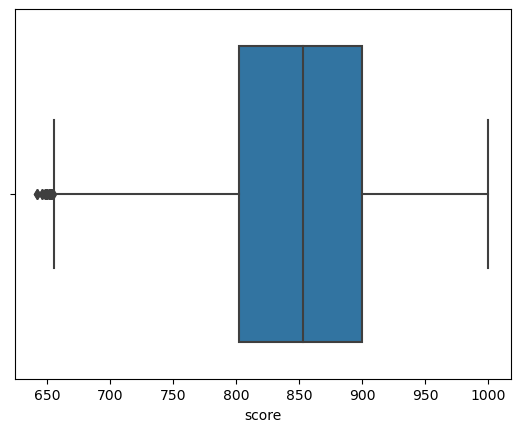

In [24]:
sns.boxplot(x='score', data=bank_scrooge)

Посмотрим, какое количество клиентов имеют балл ниже 670:

In [25]:
print('Количество клиентов с менее 670 баллами скоринга.:', len(bank_scrooge.query('score < 670')))
print('Процент от общего объема:', (len(bank_scrooge.query('score < 670'))/len(bank_scrooge))*100)

Количество клиентов с менее 670 баллами скоринга.: 75
Процент от общего объема: 0.7546030787805614


Можно их обработать, так как они составляют меньше 1% от общего числа клиентов:

In [26]:
bank_scrooge = bank_scrooge.query('score >= 670')
bank_scrooge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9864 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9864 non-null   object 
 1   score          9864 non-null   int64  
 2   city           9864 non-null   object 
 3   gender         9864 non-null   object 
 4   age            9864 non-null   int64  
 5   equity         9864 non-null   int64  
 6   balance        7669 non-null   float64
 7   products       9864 non-null   int64  
 8   credit_card    9864 non-null   int64  
 9   last_activity  9864 non-null   int64  
 10  salary         9864 non-null   float64
 11  churn          9864 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1001.8+ KB


#### Вывод:

В исходном датафрейме было 10000 записей. После обработки остались даные о 9864 клиентах. Объем уменьшился на 2-4%

- Названия столбцов приведены к змеиному регистру
- В столбце `age` обработаны пропуски
- Столбцы приведены к корректным типам данных
- Дубликатов в данных не обнаружено
- Были обработаны выбросы в столбцах `age`, `salary` и `score`

Можно приступать к исследовательскому анализу данных.

### Исследовательский анализ данных

#### Анализ клиентов

In [27]:
bank_scrooge

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0
9996,139170,894,Ярославль,М,46,0,NaN,1,1,0,196898.29,0
9997,115639,903,Ярославль,М,24,0,NaN,2,1,1,108905.09,0
9998,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0


Для столбцов `city`, `gender`, `credit_card`, `last_activity` и `churn` может подойти круговая диаграмма, так как в них находится не так много признаков, по которым можно объединить клиентов банка. Построим круговые диаграммы, используя функцию для построения:

In [28]:
def pie_graph(column):
    a = bank_scrooge.groupby(column).agg({'user_id': 'count'})
    fig, ax = plt.subplots()
    ax.pie(a['user_id'], labels=a.index, autopct='%1.1f%%')
    ax.set_title(f'Распределение клиентов по столбцу {column}')
    plt.show()

**Круговая диаграмма для столбца `city`:**

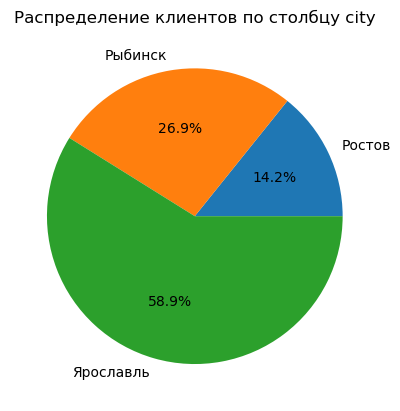

In [29]:
pie_graph('city')

**Круговая диаграмма для столбца `gender`:**

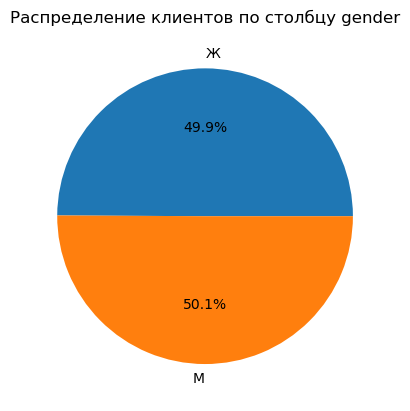

In [30]:
pie_graph('gender')

**Круговая диаграмма для столбца `credit_card`:**

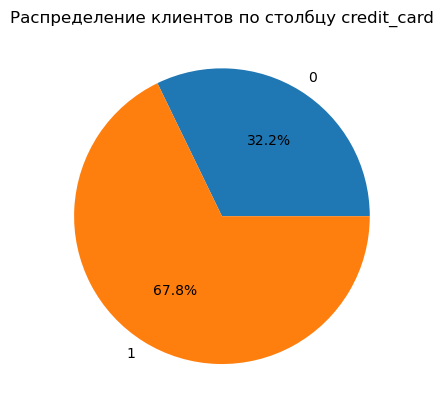

In [31]:
pie_graph('credit_card')

**Круговая диаграмма для столбца `last_activity`:**

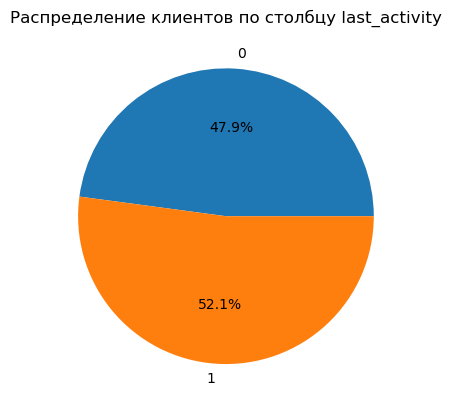

In [32]:
pie_graph('last_activity')

**Круговая диаграмма для столбца `churn`:**

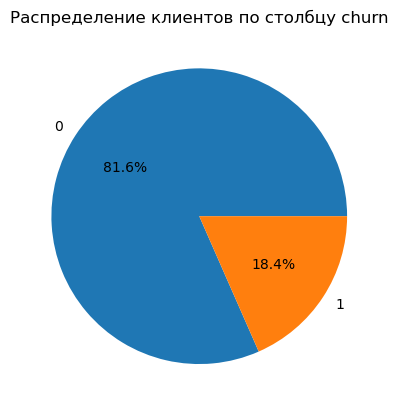

In [33]:
pie_graph('churn')

Для столбцов `age`, `score`, `balance`, `salary`, `products`, `equity` может подойти столбчатая диаграмма, так как в них находится много признаков, по которым можно объединить клиентов банка. Построим столбчатые диаграммы, используя функцию для построения:

In [34]:
# функция для столбцов с небольшим количеством признаков
def hist_graph(column):
    plt.figure(figsize=(15, 8))
    sns.countplot(bank_scrooge[column])
    plt.title(f'Распределение клиентов по столбцу {column}')
    plt.show()

# функция для столбцов с большим количество признаков
def big_graph(column):
    sns.distplot(bank_scrooge[column], bins = 70, hist=True, hist_kws={'edgecolor':'black'}, color='green')
    plt.title(f'Распределение клиентов по столбцу {column}')
    plt.show()

**Столбчатая диаграмма для столбца `age`:**

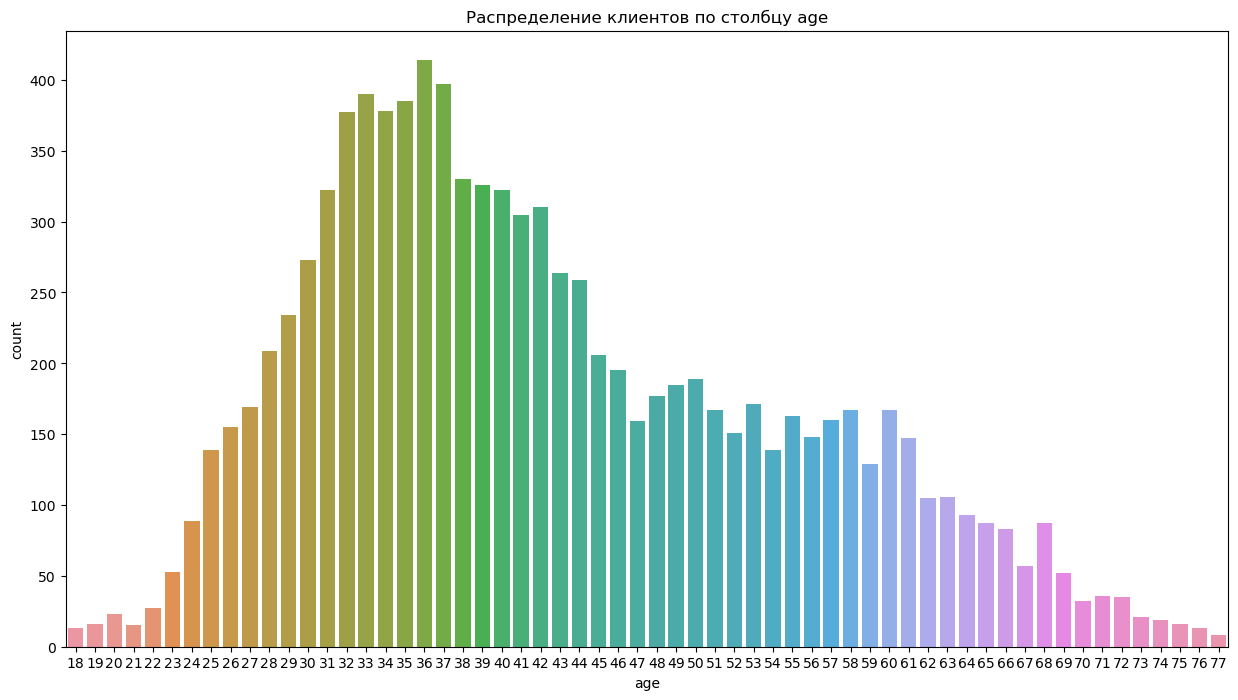

In [35]:
hist_graph('age')

**Столбчатая диаграмма для столбца `score`:**

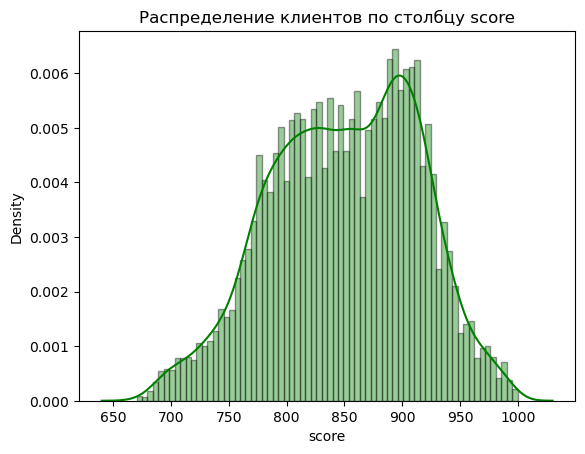

In [36]:
big_graph('score')

**Столбчатая диаграмма для столбца `balance`:**

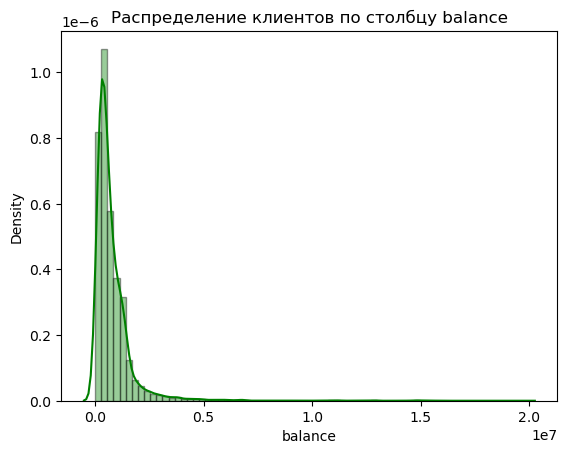

In [37]:
big_graph('balance')

**Столбчатая диаграмма для столбца `salary`:**

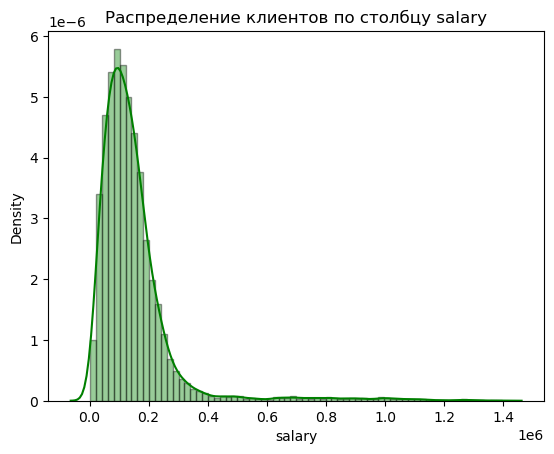

In [38]:
big_graph('salary')

**Столбчатая диаграмма для столбца `products`:**

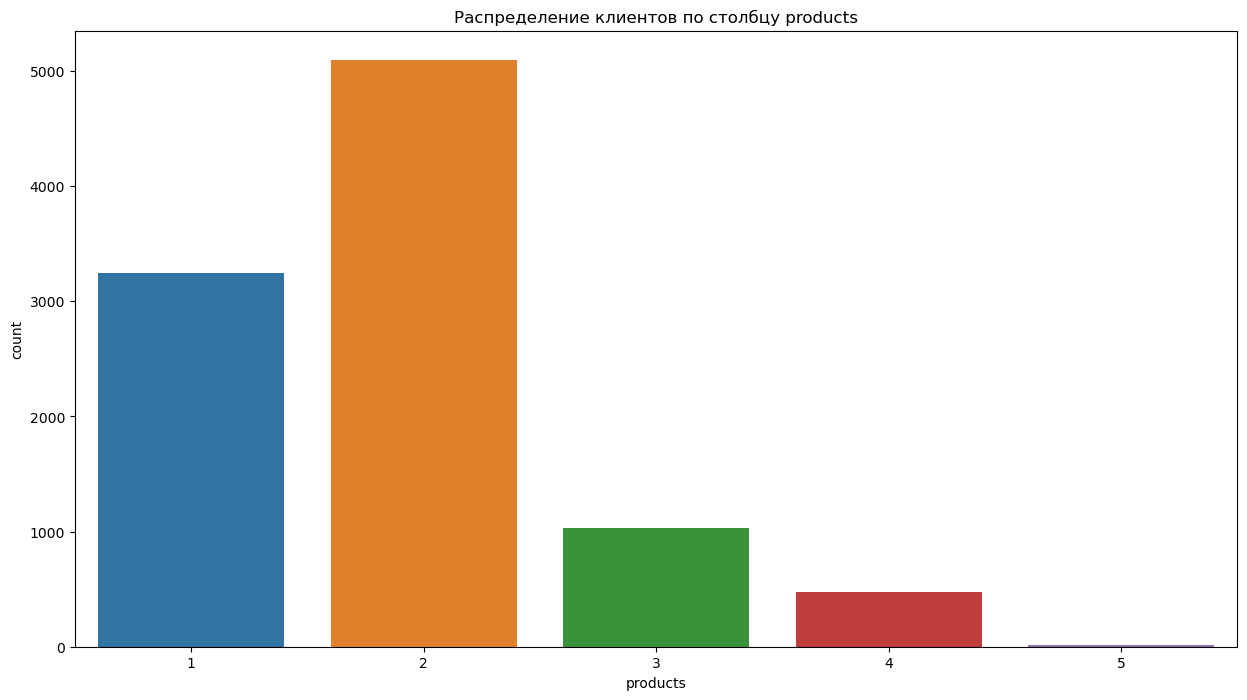

In [39]:
hist_graph('products')

**Столбчатая диаграмма для столбца `equity`:**

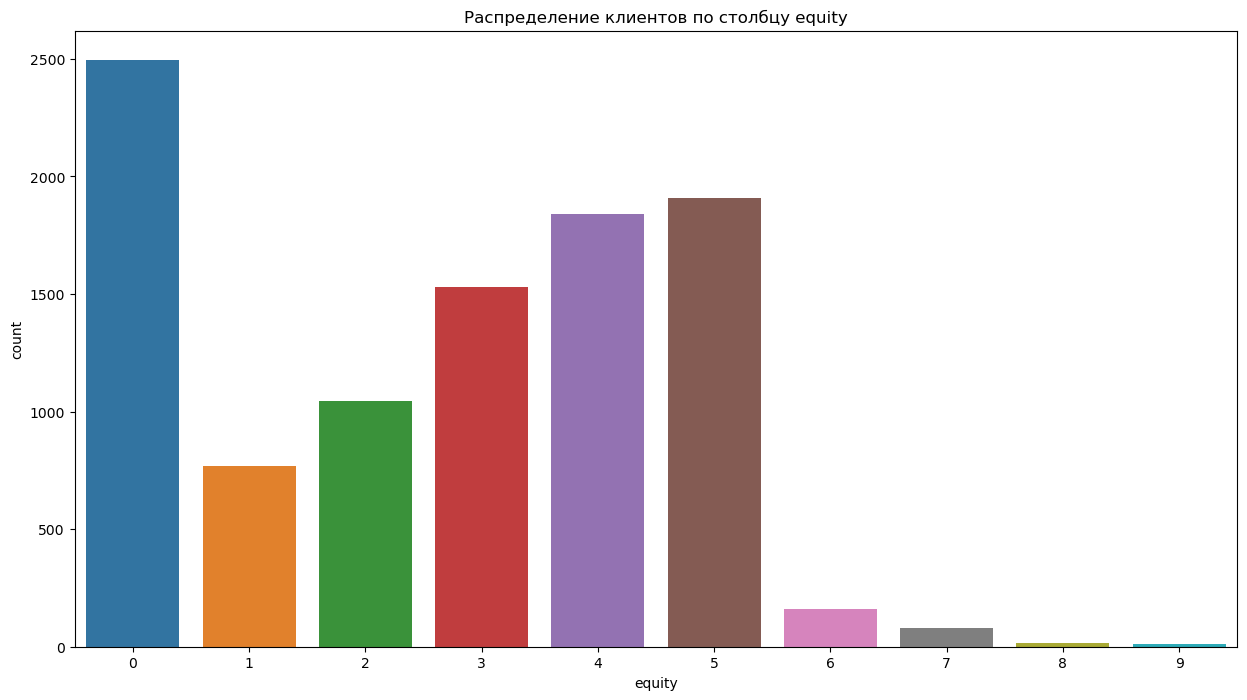

In [40]:
hist_graph('equity')

С помощью графиков мы можем составить общий портрет клиента банка:

**Обслуживание клиентов по городам:**

- В Ярославле - 58,1% от общего количества клиентов
- В Рыбинске - 27,2% от общего количества клиентов
- В Ростове - 14,7% от общего количества клиентов

**Распределение по возрасту:**

Клиенты распределены равномерно: 50,5% клиентов женского пола и 49,5% клиентов мужского пола.

**Распределение по наличию кредитной карты:**

У 67,9% клиентов имеется кредитная карта. 32,1% клиентов не имеют кредитной карты.

**Распределение по активности:**

Чуть больше половины клиентов являются активными (51,9% от общего количества).

**Распределение по текущему статусу (ушел или нет):**

Отток клиентов составляет 18,1%.

**Распределение клиентов по возрасту:**

Распределение является нормальным. Наиболее встречающийся возраст у клиентов - 32-38 лет.

**Распределение по баллам кредитного скоринга:**

Большинство клиентов имеют 770-930 баллов, однако больше всего клиентов имеют 850-900 баллов. Можно наблюдать, что в датафрейме присутствуют клиенты с максимальным количеством баллов кредитного скоринга.

**Распределение по балансу на счете:**

По графику можно наблюдать, что пик приходится на значение 0. Это является следствием того, что в данных было большое количество пропусков. Пик баланса без учета пропусков приходится на 200-500 тысяч.

**Распределение по доходу клиента:**

В среднем доход клиентов составляет от 50 до 200 тысяч. Можно наблюдать, что небольшая часть клиентов имеет доход от 200 до 400 тысяч.

**Распределение по количеству используемых продуктов:**

В датафрейме находится больше всего клиентов с двумя используемыми продуктами. Меньше всего клиентов с пятью продуктами. Больше половины клиентов имеют от 1 до 2 продуктов банка.

**Распределение по оценке собственности клиента:**

Больше всего клиентов имеют оценку 0. На графике можно отметить, что значительная часть клиентов имеют оценку собственности от 2 до 5.

#### Анализ оттока клиентов

Проведем анализ в столбцах `city`, `gender`, `last_activity` и `credit_card` с помощью сравнения по долям:

Анализ оттока по признаку `city`:

In [41]:
print('Доля ушедших клиентов в городе Ярославль:', len(bank_scrooge.query('city == "Ярославль" & churn == 1')) / len(bank_scrooge.query('city == "Ярославль"')))
print('Доля ушедших клиентов в городе Ростов:', len(bank_scrooge.query('city == "Ростов" & churn == 1')) / len(bank_scrooge.query('city == "Ростов"')))
print('Доля ушедших клиентов в городе Рыбинск:', len(bank_scrooge.query('city == "Рыбинск" & churn == 1')) / len(bank_scrooge.query('city == "Рыбинск"')))

Доля ушедших клиентов в городе Ярославль: 0.19197658402203857
Доля ушедших клиентов в городе Ростов: 0.18874643874643873
Доля ушедших клиентов в городе Рыбинск: 0.16440422322775264


Анализ оттока по признаку `gender`:

In [42]:
print('Доля ушедших клиентов-мужчин:', len(bank_scrooge.query('gender == "М" & churn == 1')) / len(bank_scrooge.query('gender == "М"')))
print('Доля ушедших клиентов-женщин:', len(bank_scrooge.query('gender == "Ж" & churn == 1')) / len(bank_scrooge.query('gender == "Ж"')))

Доля ушедших клиентов-мужчин: 0.23906882591093118
Доля ушедших клиентов-женщин: 0.12896019496344435


Анализ оттока по признаку `last_activity`:

In [43]:
print('Доля ушедших активных клиентов:', len(bank_scrooge.query('last_activity == 1 & churn == 1')) / len(bank_scrooge.query('last_activity == 1')))
print('Доля ушедших неактивных клиентов:', len(bank_scrooge.query('last_activity == 0 & churn == 1')) / len(bank_scrooge.query('last_activity == 0')))

Доля ушедших активных клиентов: 0.24800622446994747
Доля ушедших неактивных клиентов: 0.11454583950878679


Анализ оттока по признаку `credit_card`:

In [44]:
print('Доля ушедших клиентов с кредитной картой:', len(bank_scrooge.query('credit_card == 1 & churn == 1')) / len(bank_scrooge.query('credit_card == 1')))
print('Доля ушедших клиентов без кредитной карты:', len(bank_scrooge.query('credit_card == 0 & churn == 1')) / len(bank_scrooge.query('credit_card == 0')))

Доля ушедших клиентов с кредитной картой: 0.14964867693227688
Доля ушедших клиентов без кредитной карты: 0.2566929133858268


**Посмотрим распределение признаков у тех, кто ушел и кто остался, с помощью kde-графиков:**

In [45]:
new_data = bank_scrooge
bank_scrooge.loc[bank_scrooge['city'] == 'Ярославль', 'city'] = 0
bank_scrooge.loc[bank_scrooge['city'] == 'Рыбинск', 'city'] = 1
bank_scrooge.loc[bank_scrooge['city'] == 'Ростов', 'city'] = 2

bank_scrooge.loc[bank_scrooge['gender'] == 'М', 'gender'] = 1
bank_scrooge.loc[bank_scrooge['gender'] == 'Ж', 'gender'] = 0

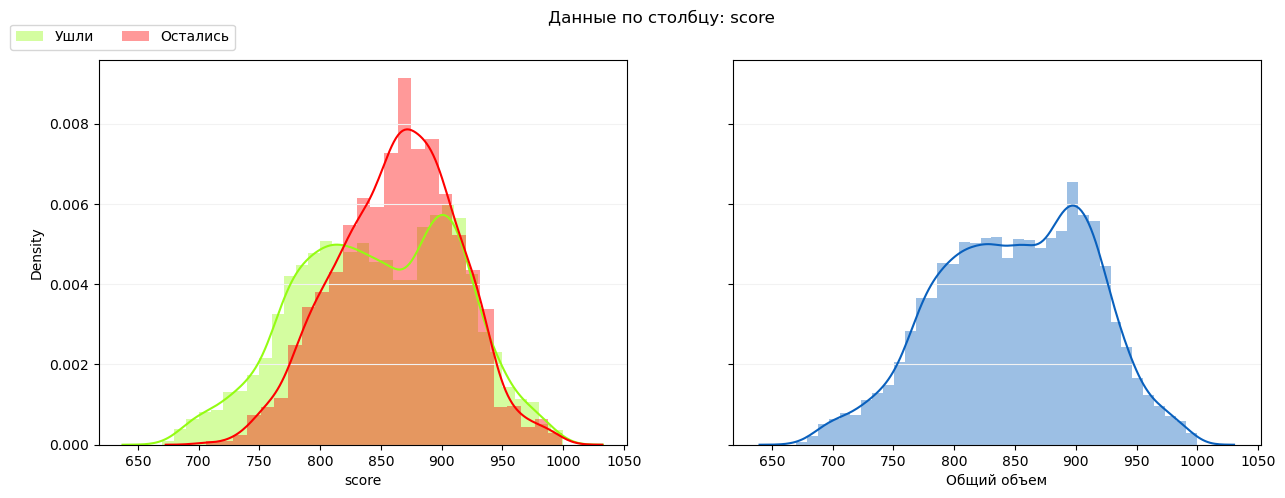

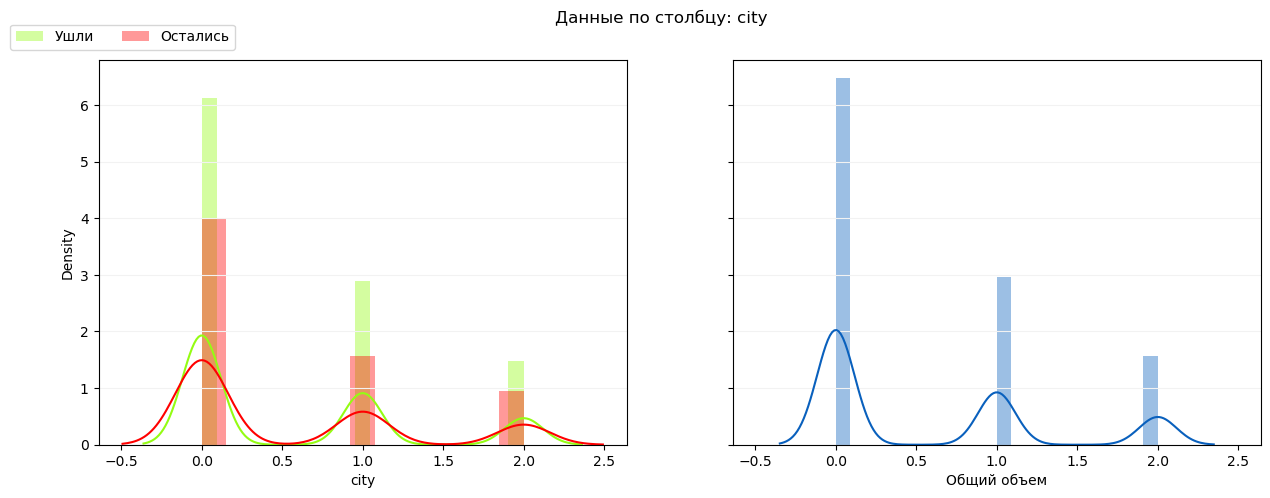

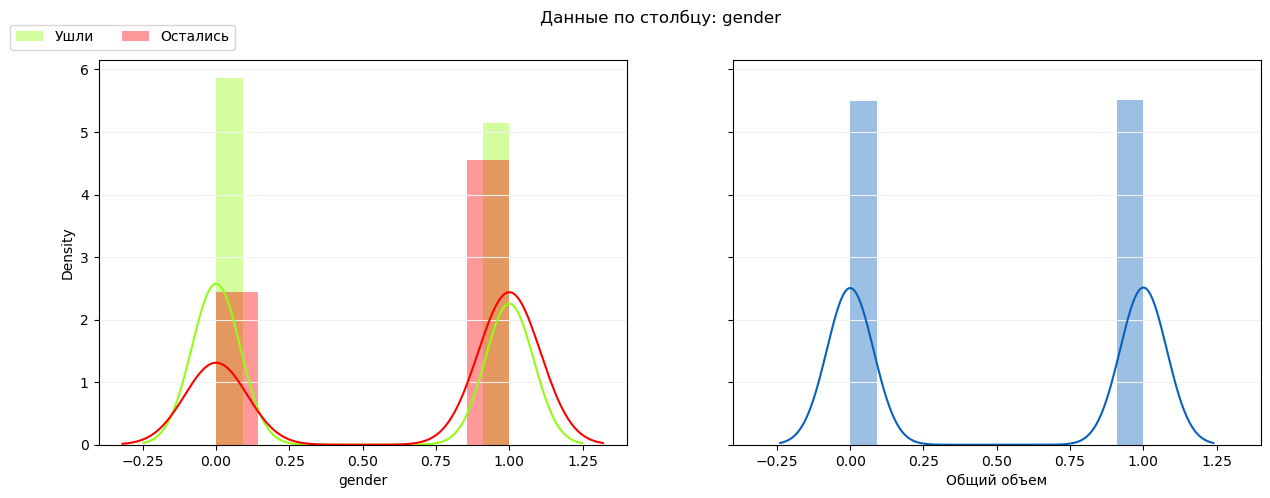

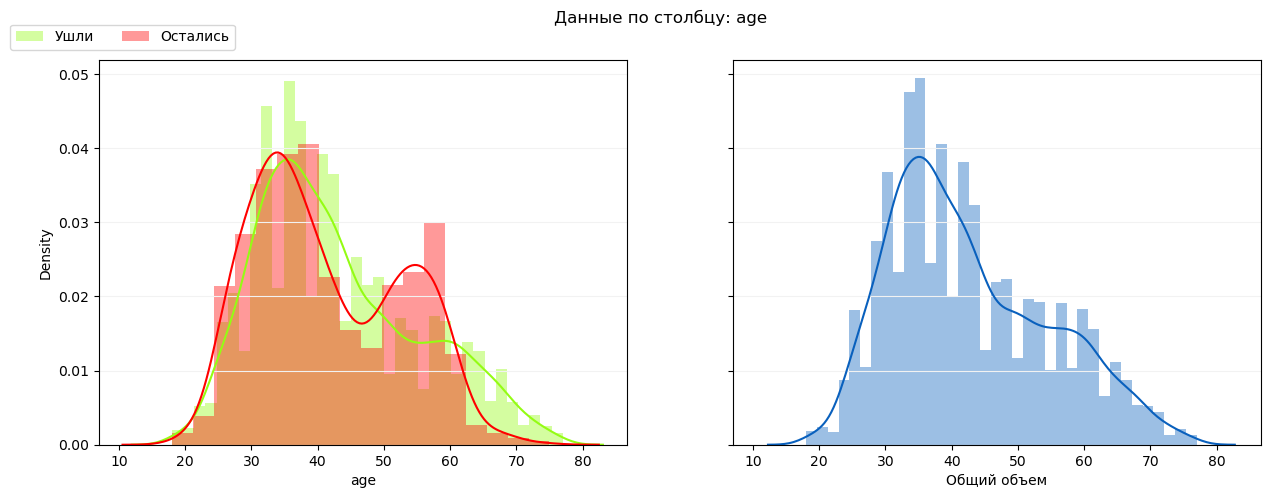

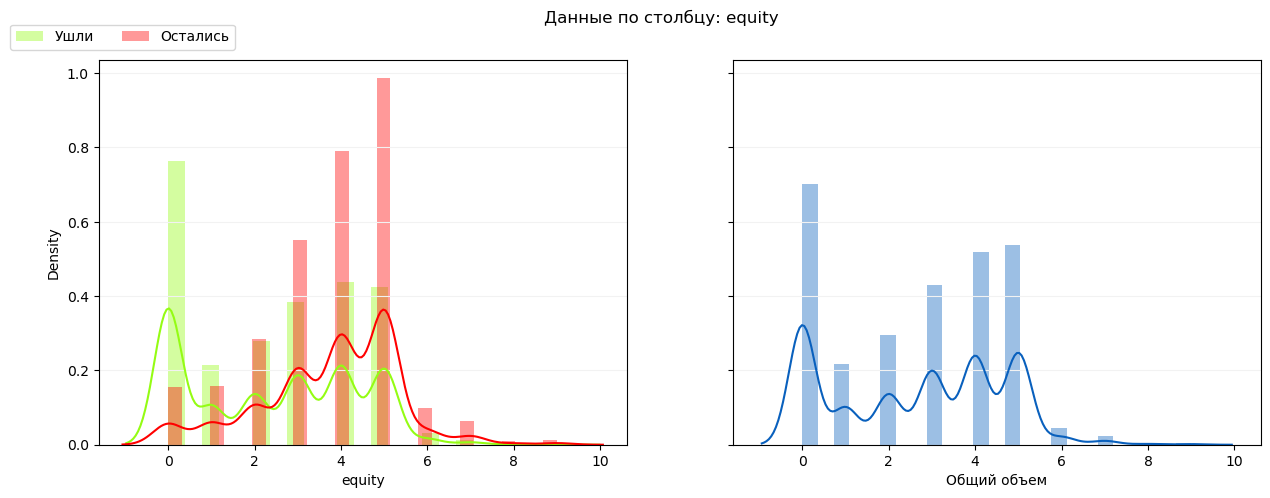

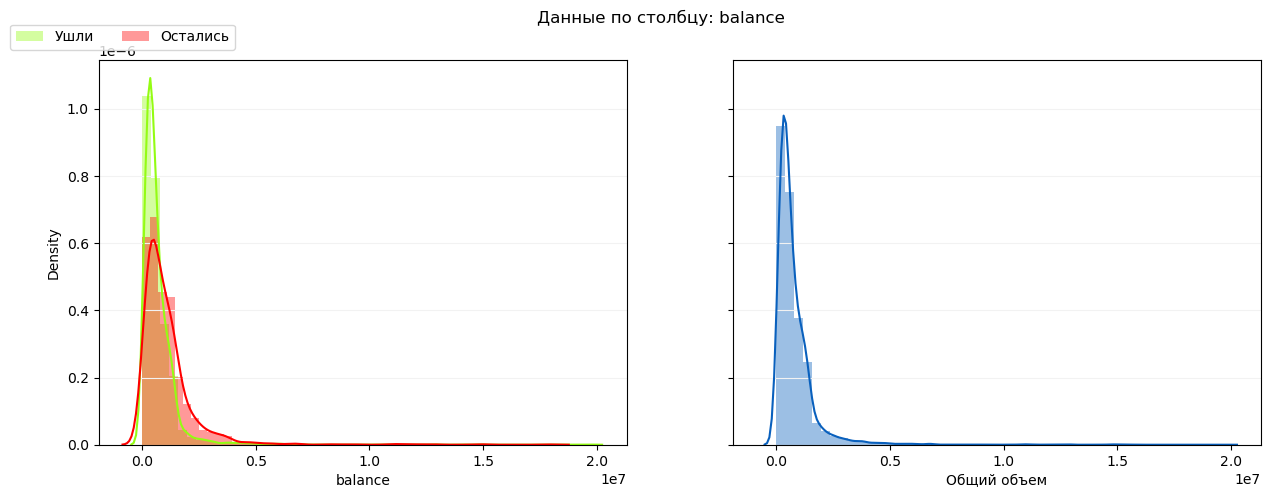

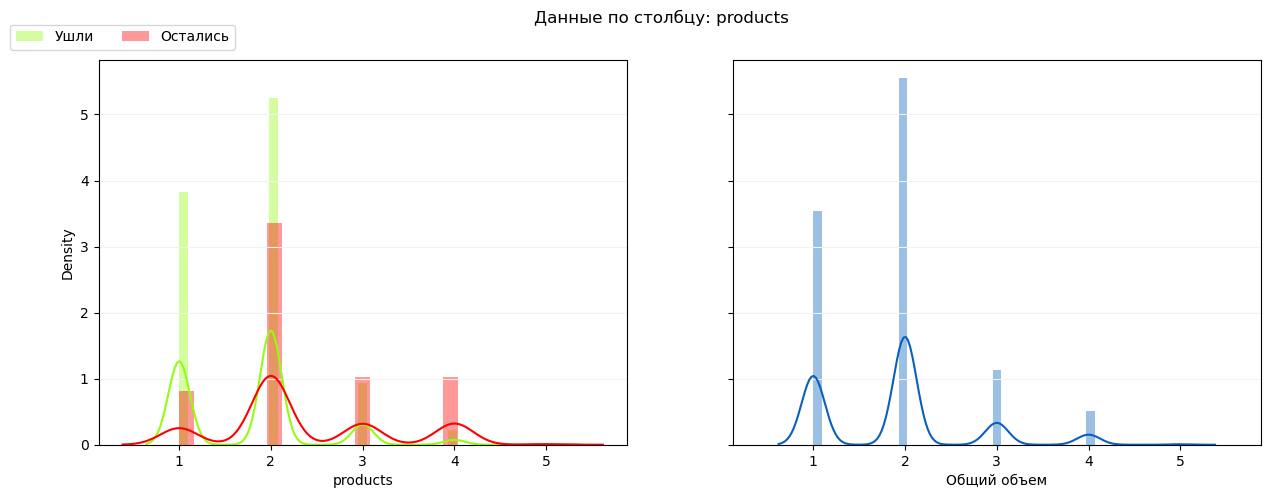

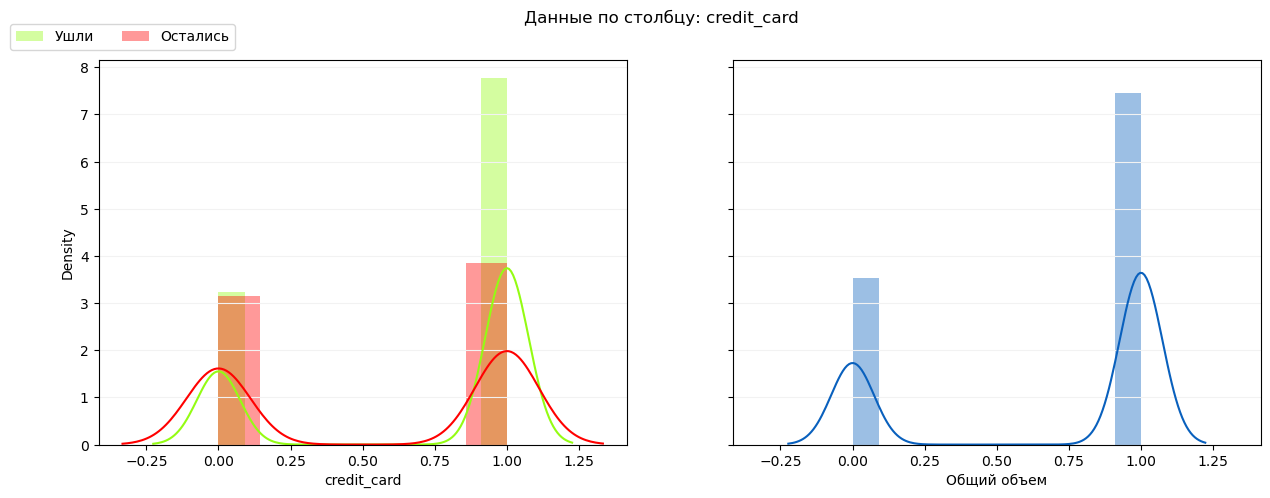

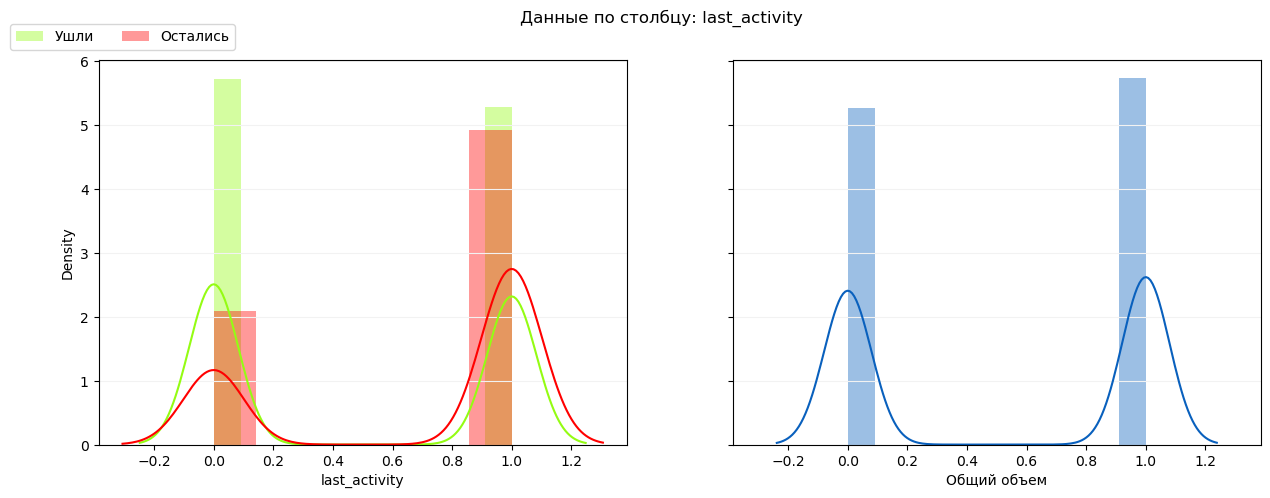

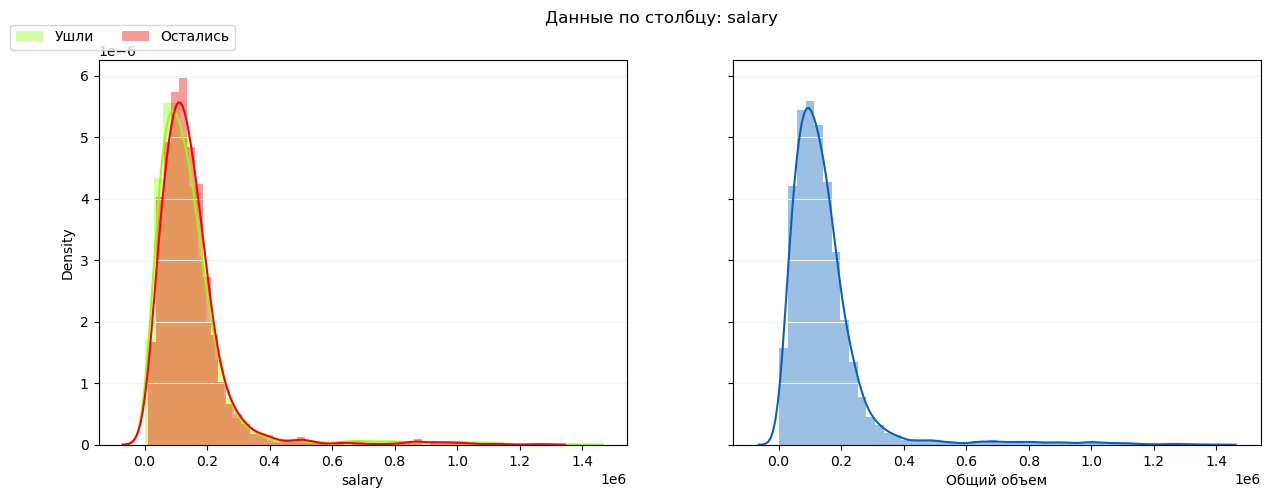

In [46]:
columns = bank_scrooge.drop(['churn', 'user_id'], axis=1).columns
for column in columns:
    x1 = bank_scrooge[bank_scrooge['churn']==0][column]
    x2 = bank_scrooge[bank_scrooge['churn']==1][column]
    x3 = bank_scrooge[column]

    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)
    fig.suptitle('Данные по столбцу: ' + column)
    sns.distplot(x1 , color="#94fc13", ax=axes[0], label='Ушли')
    sns.distplot(x2 , color="#ff0000", ax=axes[0], label = 'Остались')
    sns.distplot(x3 , color="#0960bd", ax=axes[1], axlabel='Общий объем')
    fig.legend(bbox_to_anchor=(0.066, 0.9), loc='lower left', ncol=2, borderaxespad=0.)
    axes[0].set(ylabel='Density')
    axes[0].grid(axis='y', color='0.95')
    axes[1].grid(axis='y', color='0.95')
    plt.show()

C помощью графиков можно сделать следующие наблюдения:

- Больше всего уходит клиентов в Ростове (18,7% клиентов уходит)
- Чаще всего уходят мужчины
- Активные клиенты уходят чаще, чем неактивные
- Клиенты без кредитной карты уходят чаще, чем клиенты с картой

Парные графики помогают сделать следующие выводы об оттоке клиентов:

- Чаще всего уходили люди 30-40 лет
- Клиенты с приблизительной оценкой собственности в диапазоне от 4 до 6 склонны переставать пользоваться используемыми продуктами. Можно предположить, что они пытаются найти то, что им по настоящему понравится, однако не находят
- Больше всего клиентов, которые перестали пользоваться продуктами, имели два используемых продукта
- Клиенты, которые имели баланс на счету от 300 до 500 тысяч, чаще всего переставали пользоваться продуктами
- Чаще всего уходили клиенты с доходом 100-120 тысяч

#### Анализ зависимости признаков

**Для проведения анализа зависимости признаков от друг друга необходимо использовать корреляцию Пирсона:**

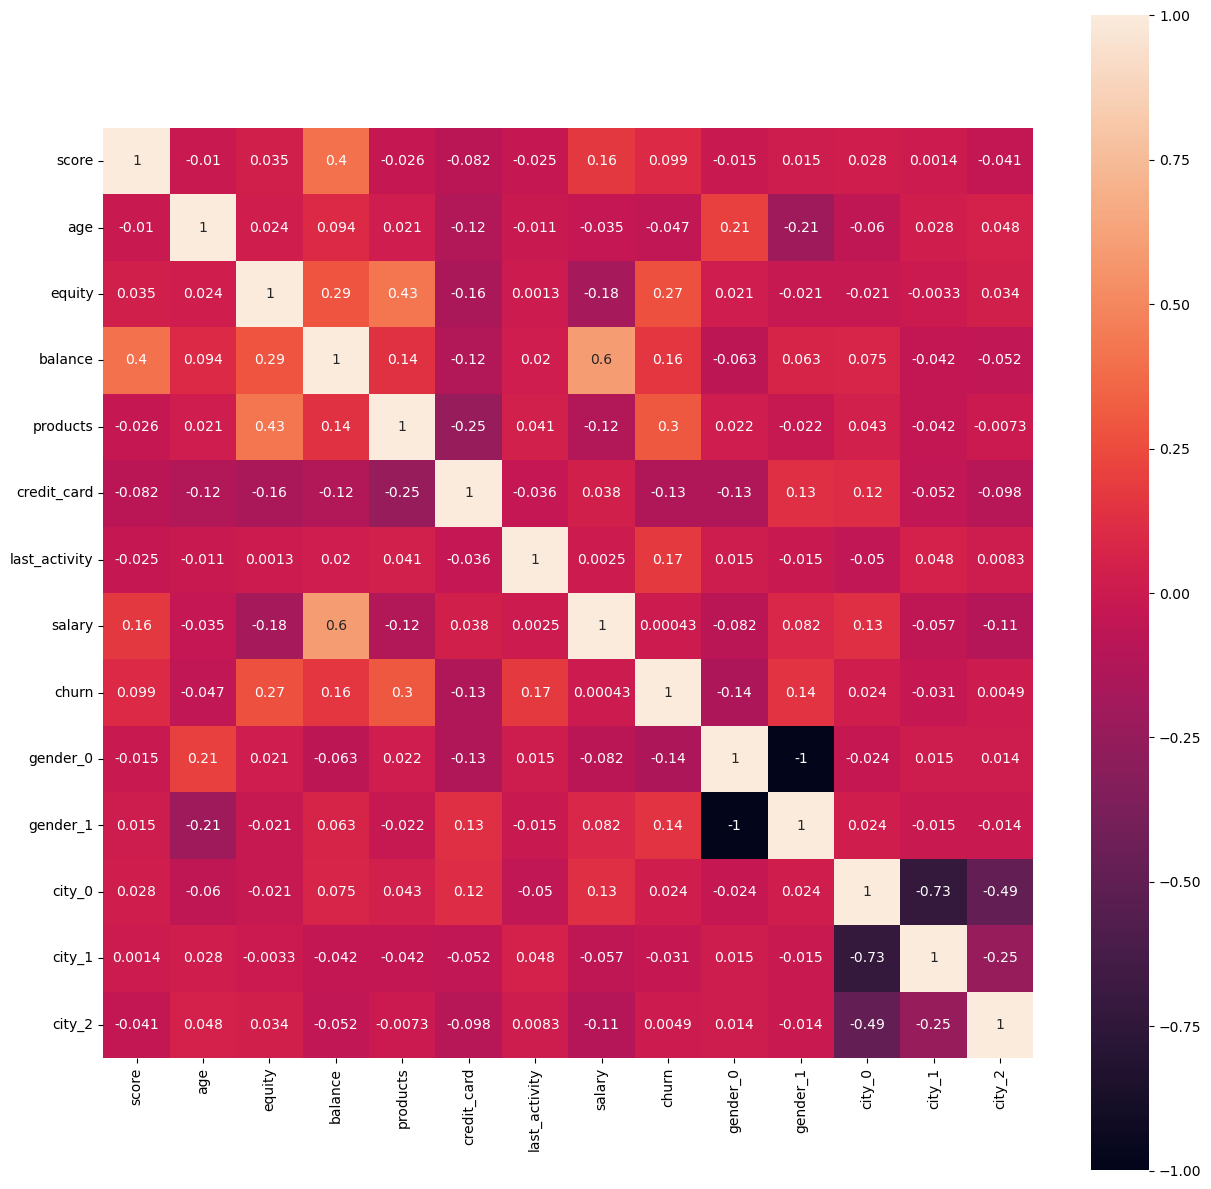

In [47]:
new_data = pd.get_dummies(new_data, columns=['gender', 'city'])
data = new_data.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(data, annot=True, square=True)
plt.show()

С помощью корреляции Пирсона можно определить зависимость и точно сказать:

Небольшая прямая зависимость между признаками:

- equity и products. Можно сказать, что в целом клиенты с высокой оценкой собственности имеют больше используемых продуктов банка.

- balance и salary. Можно сказать, что эта зависимость вполне реальная, так как при достатке клиенты могут иметь приличные балансы.

Между городами Ярославль и Ростов существует обратная зависимость. 

Остальные признаки не зависят друг друга и являются самостоятельными.

#### Вывод:

По полученным результатам исследовательского анализа данных можно сделать следующие выводы о клиентах банка:

- 58% клиентов обслуживается в городе Ярославль. В Рыбинске - 27%, в Ростове - 15%
- Отток клиентов - 18,1%. Самый большой отток наблюдается среди клиентов из города Ростов
- Клиенты, у которых имеется кредитная карта, составляют 67,9% от общего количества
- Средний возраст клиентов банка составляет от 32 до 38 лет
- Большинство клиентов имеют 770-930 баллов. Больше всего клиентов с баллами в диапазоне от 850 до 900
- Средний баланс составляет 300-350 тысяч
- Средний доход клиентов составляет 125 тысяч рублей
- Больше всего клиентов, которые пользуются двумя продуктами. Чаще всего клиенты пользуются 1-2 продуктами.
- Клиенты с 4-5 продуктами чаще всего уходят
- Чаще всего мужчины склонны переставать пользоваться продуктами
- Активные клиенты уходят чаще, чем неактивные
- Есть прямая зависимость между балансом на счете и доходом клиента. Чем доход больше, тем баланс больше. Между другими признаками сильной зависимости не наблюдается.

### Сегментация клиентов по количеству потребляемых продуктов

**Построим круговую диаграмму с соотношением клиентов по количеству потребляемых продуктов:**

Text(0.5, 1.0, 'Cоотношение клиентов по количеству потребляемых продуктов')

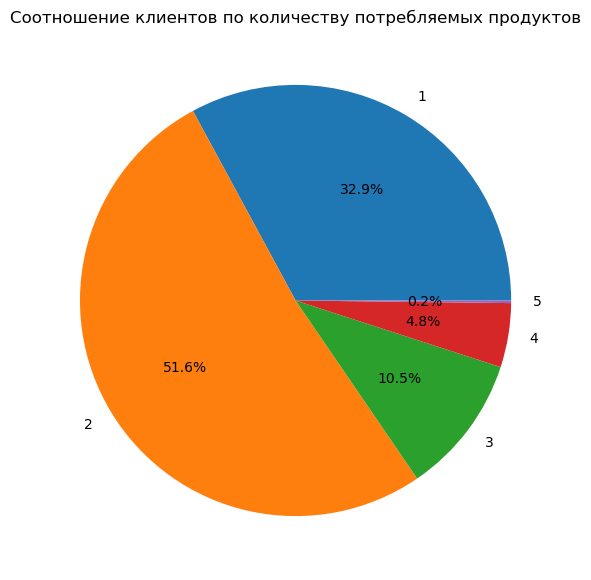

In [48]:
total_products = bank_scrooge.groupby('products')['products'].count()
fig, ax = plt.subplots(figsize=(12, 7))
ax.pie(total_products, labels=total_products.index, autopct='%1.1f%%')
ax.set_title('Cоотношение клиентов по количеству потребляемых продуктов')

Можно отметить, что ситуация не изменилась. Чуть больше половины клиентов пользуются двумя продуктами. Меньше всего пользуются 4-5 продуктами. Необходимо найти процент оттока клиентов по каждому сегменту:

In [49]:
churn_score = bank_scrooge.groupby('products').agg({'user_id': 'count', 'churn': 'sum'}).reset_index()
churn_score['percent'] = round(churn_score['churn']/churn_score['user_id'] * 100)
churn_score.sort_values(by='percent', ascending=False)

,products,user_id,churn,percent
3,4,474,300,63.0
4,5,19,8,42.0
2,3,1032,297,29.0
1,2,5094,976,19.0
0,1,3245,235,7.0


Можно отметить, что около 62% клиентов уходит, если они пользовались четырьмя продуктами. 8 из 19 клиентов пользовались пятью продуктами и приняли решение об уходе.

**Рассмотрим отток клиентов по городам в зависимости от количества потребляемых продуктов:**

In [50]:
Yaroslavl_city = bank_scrooge.query('city == "Ярославль" & churn == 1')
Rostov_city = bank_scrooge.query('city == "Ростов" & churn == 1')
Rybinsk_city = bank_scrooge.query('city == "Рыбинск" & churn == 1')

print(Yaroslavl_city.groupby('products')['churn'].count(), Rostov_city.groupby('products')['churn'].count(), Rybinsk_city.groupby('products')['churn'].count())

Series([], Name: churn, dtype: int64) Series([], Name: churn, dtype: int64) Series([], Name: churn, dtype: int64)


Во всех трех городах клиенты, которые пользовались двумя продуктами, чаще всего уходили. Мы это уже отмечали на более ранних этапах исследования. Можно отметить, что в Ростове нет клиентов, которые пользовались пятью продуктами и ушли, в Рыбинске всего один такой клиент.

**Применим диаграмму размаха для оценки распределения признаков в разрезе количества потребляемых продуктов:**

In [51]:
def box_graph(column):
    plt.figure()
    sns.boxplot(data=bank_scrooge, y=column, x='products')
    plt.xlabel('Количество потребляемых продуктов')
    plt.ylabel('Единица измерения')
    plt.title(column)
    plt.show()

**Диаграмма размаха для столбца `age`:**

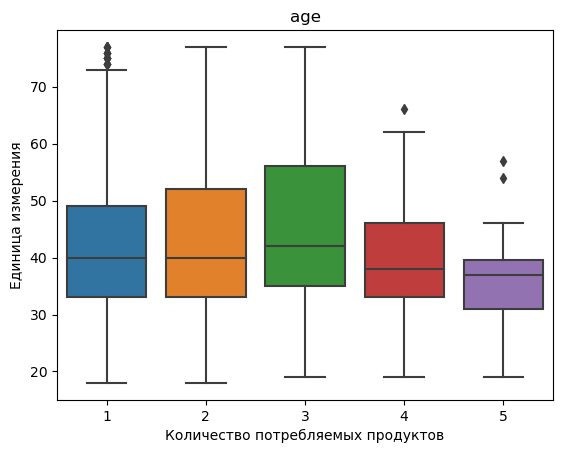

In [52]:
box_graph('age')

**Диаграмма размаха для столбца `score`:**

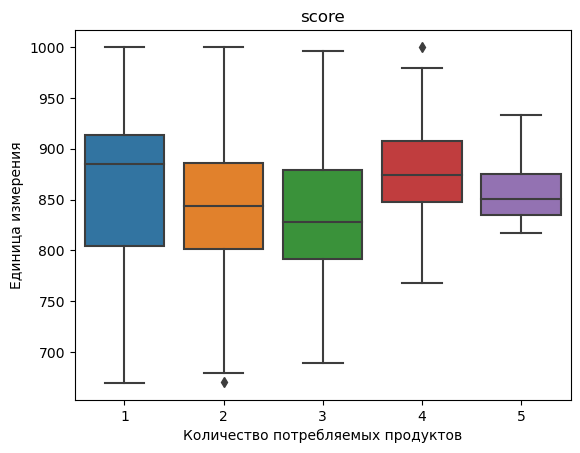

In [53]:
box_graph('score')

**Диаграмма размаха для столбца `salary`:**

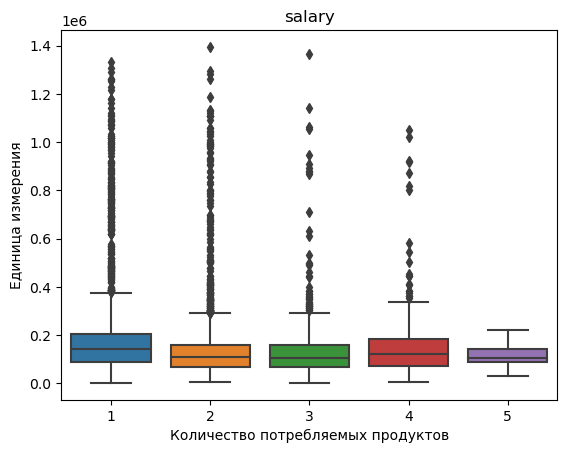

In [54]:
box_graph('salary')

**Диаграмма размаха для столбца `balance`:**

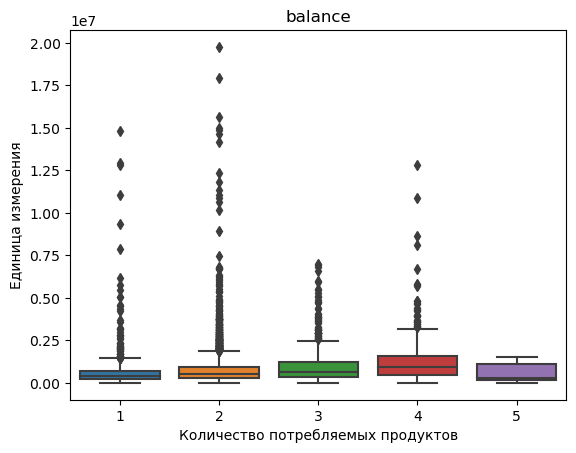

In [55]:
box_graph('balance')

**Диаграмма размаха для столбца `equity`:**

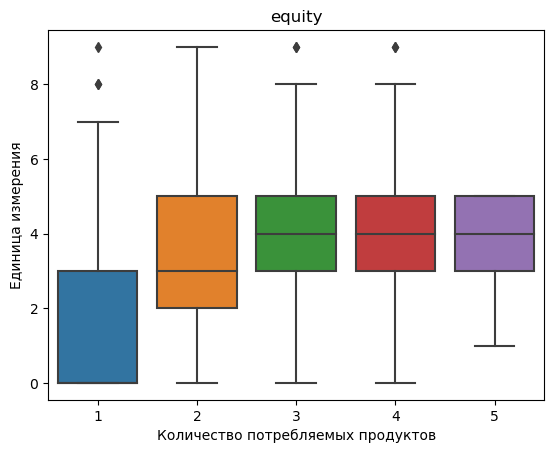

In [56]:
box_graph('equity')

**Рассмотрим распределение клиентов по признакам `gender`, `last_activity`, `credit_card` и `churn`:**

Распределение клиентов по признаку `gender`:

In [57]:
print('Доля клиентов-мужчин с одним продуктом:', len(bank_scrooge.query('gender == 1 & products == 1')) / len(bank_scrooge.query('gender == 1')))
print('Доля клиентов-мужчин с двумя продуктами:', len(bank_scrooge.query('gender == 1 & products == 2')) / len(bank_scrooge.query('gender == 1')))
print('Доля клиентов-мужчин с тремя продуктами:', len(bank_scrooge.query('gender == 1 & products == 3')) / len(bank_scrooge.query('gender == 1')))
print('Доля клиентов-мужчин с 4 продуктами:', len(bank_scrooge.query('gender == 1 & products == 4')) / len(bank_scrooge.query('gender == 1')))
print('Доля клиентов-мужчин с 5 продуктами:', len(bank_scrooge.query('gender == 1 & products == 5')) / len(bank_scrooge.query('gender == 1')))
print()
print('Доля клиентов-женщин с одним продуктом:', len(bank_scrooge.query('gender == 0 & products == 1')) / len(bank_scrooge.query('gender == 0')))
print('Доля клиентов-женщин с двумя продуктами:', len(bank_scrooge.query('gender == 0 & products == 2')) / len(bank_scrooge.query('gender == 0')))
print('Доля клиентов-женщин с тремя продуктами:', len(bank_scrooge.query('gender == 0 & products == 3')) / len(bank_scrooge.query('gender == 0')))
print('Доля клиентов-женщин с 4 продуктами:', len(bank_scrooge.query('gender == 0 & products == 4')) / len(bank_scrooge.query('gender == 0')))
print('Доля клиентов-женщин с 5 продуктами:', len(bank_scrooge.query('gender == 0 & products == 5')) / len(bank_scrooge.query('gender == 0')))

Доля клиентов-мужчин с одним продуктом: 0.35526315789473684
Доля клиентов-мужчин с двумя продуктами: 0.49291497975708504
Доля клиентов-мужчин с тремя продуктами: 0.09008097165991903
Доля клиентов-мужчин с 4 продуктами: 0.0597165991902834
Доля клиентов-мужчин с 5 продуктами: 0.0020242914979757085

Доля клиентов-женщин с одним продуктом: 0.3025995125913891
Доля клиентов-женщин с двумя продуктами: 0.5400081234768481
Доля клиентов-женщин с тремя продуктами: 0.11921202274573517
Доля клиентов-женщин с 4 продуктами: 0.03635255889520715
Доля клиентов-женщин с 5 продуктами: 0.0018277822908204712


Мужчины чаще всего пользуются 1-2 продуктами. Меньше всего 4-5 продуктами. Ситуация с женщинами аналогичная.

Распределение клиентов по признаку `last_activity`:

In [58]:
print('Доля активных клиентов с одним продуктом:', len(bank_scrooge.query('last_activity == 1 & products == 1')) / len(bank_scrooge.query('last_activity == 1')))
print('Доля активных клиентов с двумя продуктами:', len(bank_scrooge.query('last_activity == 1 & products == 2')) / len(bank_scrooge.query('last_activity == 1')))
print('Доля активных клиентов с тремя продуктами:', len(bank_scrooge.query('last_activity == 1 & products == 3')) / len(bank_scrooge.query('last_activity == 1')))
print('Доля активных клиентов с 4 продуктами:', len(bank_scrooge.query('last_activity == 1 & products == 4')) / len(bank_scrooge.query('last_activity == 1')))
print('Доля активных клиентов с 5 продуктами:', len(bank_scrooge.query('last_activity == 1 & products == 5')) / len(bank_scrooge.query('last_activity == 1')))
print()
print('Доля неактивных клиентов с одним продуктом:', len(bank_scrooge.query('last_activity == 0 & products == 1')) / len(bank_scrooge.query('last_activity == 0')))
print('Доля неактивных клиентов с двумя продуктами:', len(bank_scrooge.query('last_activity == 0 & products == 2')) / len(bank_scrooge.query('last_activity == 0')))
print('Доля неактивных клиентов с тремя продуктами:', len(bank_scrooge.query('last_activity == 0 & products == 3')) / len(bank_scrooge.query('last_activity == 0')))
print('Доля неактивных клиентов с 4 продуктами:', len(bank_scrooge.query('last_activity == 0 & products == 4')) / len(bank_scrooge.query('last_activity == 0')))
print('Доля неактивных клиентов с 5 продуктами:', len(bank_scrooge.query('last_activity == 0 & products == 5')) / len(bank_scrooge.query('last_activity == 0')))

Доля активных клиентов с одним продуктом: 0.32989690721649484
Доля активных клиентов с двумя продуктами: 0.5106010503793036
Доля активных клиентов с тремя продуктами: 0.08344680023341762
Доля активных клиентов с 4 продуктами: 0.07274849251118459
Доля активных клиентов с 5 продуктами: 0.0033067496595992995

Доля неактивных клиентов с одним продуктом: 0.3279695109040864
Доля неактивных клиентов с двумя продуктами: 0.522760957018844
Доля неактивных клиентов с тремя продуктами: 0.1276730891382596
Доля неактивных клиентов с 4 продуктами: 0.021172983273343216
Доля неактивных клиентов с 5 продуктами: 0.0004234596654668643


Активные и неактивные клиенты чаще пользуются 1-2 продуктами, Меньше всего - пятью продуктами.

Распределение клиентов по признаку `credit_card`:

In [59]:
print('Доля клиентов с кредитной картой и с одним продуктом:', len(bank_scrooge.query('credit_card == 1 & products == 1')) / len(bank_scrooge.query('credit_card == 1')))
print('Доля клиентов с кредитной картой и с двумя продуктами:', len(bank_scrooge.query('credit_card == 1 & products == 2')) / len(bank_scrooge.query('credit_card == 1')))
print('Доля клиентов с кредитной картой и с тремя продуктами:', len(bank_scrooge.query('credit_card == 1 & products == 3')) / len(bank_scrooge.query('credit_card == 1')))
print('Доля клиентов с кредитной картой и с 4 продуктами:', len(bank_scrooge.query('credit_card == 1 & products == 4')) / len(bank_scrooge.query('credit_card == 1')))
print('Доля клиентов с кредитной картой и с 5 продуктами:', len(bank_scrooge.query('credit_card == 1 & products == 5')) / len(bank_scrooge.query('credit_card == 1')))
print()
print('Доля клиентов с кредитной картой и с одним продуктом:', len(bank_scrooge.query('credit_card == 0 & products == 1')) / len(bank_scrooge.query('credit_card == 0')))
print('Доля клиентов с кредитной картой и с двумя продуктами:', len(bank_scrooge.query('credit_card == 0 & products == 2')) / len(bank_scrooge.query('credit_card == 0')))
print('Доля клиентов с кредитной картой и с тремя продуктами:', len(bank_scrooge.query('credit_card == 0 & products == 3')) / len(bank_scrooge.query('credit_card == 0')))
print('Доля клиентов с кредитной картой и с 4 продуктами:', len(bank_scrooge.query('credit_card == 0 & products == 4')) / len(bank_scrooge.query('credit_card == 0')))
print('Доля клиентов с кредитной картой и с 5 продуктами:', len(bank_scrooge.query('credit_card == 0 & products == 5')) / len(bank_scrooge.query('credit_card == 0')))

Доля клиентов с кредитной картой и с одним продуктом: 0.41770070264613546
Доля клиентов с кредитной картой и с двумя продуктами: 0.4763043803259082
Доля клиентов с кредитной картой и с тремя продуктами: 0.0548661982359097
Доля клиентов с кредитной картой и с 4 продуктами: 0.048288234414710716
Доля клиентов с кредитной картой и с 5 продуктами: 0.0028404843773359245

Доля клиентов с кредитной картой и с одним продуктом: 0.14204724409448818
Доля клиентов с кредитной картой и с двумя продуктами: 0.6009448818897638
Доля клиентов с кредитной картой и с тремя продуктами: 0.2094488188976378
Доля клиентов с кредитной картой и с 4 продуктами: 0.04755905511811023
Доля клиентов с кредитной картой и с 5 продуктами: 0.0


Клиенты с кредитной картой чаще пользуются двумя продуктами. Клиенты без кредитной карты чаще всего пользуются тоже двумя продуктами. Можно заметить, что клиенты без кредитной карты не так часто пользуются одним продуктом, как клиенты с кредитной картой, однако чаще пользуются тремя продуктами.

Распределение клиентов по признаку `churn`:

In [60]:
print('Доля ушедших клиентов с одним продуктом:', len(bank_scrooge.query('churn == 1 & products == 1')) / len(bank_scrooge.query('churn == 1')))
print('Доля ушедших клиентов с двумя продуктами:', len(bank_scrooge.query('churn == 1 & products == 2')) / len(bank_scrooge.query('churn == 1')))
print('Доля ушедших клиентов с тремя продуктами:', len(bank_scrooge.query('churn == 1 & products == 3')) / len(bank_scrooge.query('churn == 1')))
print('Доля ушедших клиентов с 4 продуктами:', len(bank_scrooge.query('churn == 1 & products == 4')) / len(bank_scrooge.query('churn == 1')))
print('Доля ушедших клиентов с 5 продуктами:', len(bank_scrooge.query('churn == 1 & products == 5')) / len(bank_scrooge.query('churn == 1')))
print()
print('Доля оставшихся клиентов с одним продуктом:', len(bank_scrooge.query('churn == 0 & products == 1')) / len(bank_scrooge.query('churn == 0')))
print('Доля оставшихся клиентов с двумя продуктами:', len(bank_scrooge.query('churn == 0 & products == 2')) / len(bank_scrooge.query('churn == 0')))
print('Доля оставшихся клиентов с тремя продуктами:', len(bank_scrooge.query('churn == 0 & products == 3')) / len(bank_scrooge.query('churn == 0')))
print('Доля оставшихся клиентов с 4 продуктами:', len(bank_scrooge.query('churn == 0 & products == 4')) / len(bank_scrooge.query('churn == 0')))
print('Доля оставшихся клиентов с 5 продуктами:', len(bank_scrooge.query('churn == 0 & products == 5')) / len(bank_scrooge.query('churn == 0')))

Доля ушедших клиентов с одним продуктом: 0.12940528634361234
Доля ушедших клиентов с двумя продуктами: 0.5374449339207048
Доля ушедших клиентов с тремя продуктами: 0.16354625550660792
Доля ушедших клиентов с 4 продуктами: 0.16519823788546256
Доля ушедших клиентов с 5 продуктами: 0.004405286343612335

Доля оставшихся клиентов с одним продуктом: 0.3740059642147117
Доля оставшихся клиентов с двумя продуктами: 0.5116799204771372
Доля оставшихся клиентов с тремя продуктами: 0.09132703777335983
Доля оставшихся клиентов с 4 продуктами: 0.02162027833001988
Доля оставшихся клиентов с 5 продуктами: 0.0013667992047713719


Чаще всего уходят клиенты, которые использовали два продукта. Чаще всего остаются клиенты, которые пользовались 1-2 продуктами. Можно отметить, что клиенты, которые пользовались 3-4 продуктами, уходили чаще, чем оставались.

#### Вывод:

На основе полученных результатов сегментации клиентов по количеству потребляемых клиентов можно сделать следующие выводы:

- Сегмент 1: Доля клиентов в этом сегменте составляет 32,3%. Средний возраст клиентов составляет 35-49 лет. Кредитный рейтинг - от 820 до 920 баллов. Средняя зарплата клиента составляет 140 тысяч. Приблизительная оценка собственности клиента составляет от 0 до 7. Клиентами чаще всего являются мужчины. Активных клиентов немного больше, чем неактивных. Количество клиентов, у которых имеется кредитная карта, в 5 раз больше, чем тех, у кого ее нет. Отток клиентов составляет 9-10%, он является самым низким показателем среди всех сегментов.

- Сегмент 2: Доля клиентов в этом сегменте составляет 52,4%. Средний возраст клиентов составляет 35-52 года. Кредитный рейтинг - от 810 до 880 баллов. Средняя зарплата клиента составляет 120 тысяч. Приблизительная оценка собственности клиента составляет от 2 до 5. Клиентами чаще всего являются женщины. Активные клиенты преобладают. Количество клиентов, у которых имеется кредитная карта, почти вдвое больше, чем тех, у кого ее нет. Отток клиентов составляет 20%.

- Сегмент 3: Доля клиентов в этом сегменте составляет 10,5%. Средний возраст клиентов составляет 38-57 лет. Кредитный рейтинг - от 790 до 860 баллов. Средняя зарплата клиента составляет 120 тысяч. Приблизительная оценка собственности клиента составляет от 3 до 5. Клиентами чаще всего являются женщины. Неактивные клиенты преобладают. Количество клиентов, у которых имеется кредитная карта, меньше, чем тех, у кого ее нет. Отток клиентов составляет 35-40%.

- Сегмент 4: Доля клиентов в этом сегменте составляет 4,6%. Средний возраст клиентов составляет 33-45 лет. Кредитный рейтинг - от 850 до 900 баллов. Средняя зарплата клиента составляет 130-140 тысяч. Приблизительная оценка собственности клиента составляет от 3 до 5. Клиентами чаще всего являются мужчины. Активные клиенты преобладают. Количество клиентов, у которых имеется кредитная карта, в 1,5 раза больше, чем тех, у кого ее нет. Отток клиентов составляет 60-65%, он является самым худшим показателем среди всех сегментов.

- Сегмент 5: Доля клиентов в этом сегменте составляет 0,2%. Средний возраст клиентов составляет 31-40 лет. Кредитный рейтинг - от 850 до 870 баллов. Средняя зарплата клиента составляет 100 тысяч. Приблизительная оценка собственности клиента составляет от 3 до 5. Клиентами чаще всего являются мужчины. Активные клиенты преобладают. Количество клиентов, у которых имеется кредитная карта, немного больше, чем тех, у кого ее нет.

### Проверка статистических гипотез

#### Гипотеза о среднем доходе клиентов

- Нулевая гипотеза: средний доход клиентов, которые пользуются одним продуктом банка, не отличается от среднего дохода клиентов, которые пользуются двумя или более продуктами банка.
- Альтернативная гипотеза: средний доход клиентов, которые пользуются одним продуктом банка, отличается от среднего дохода клиентов, которые пользуются двумя или более продуктами банка.

<AxesSubplot:>

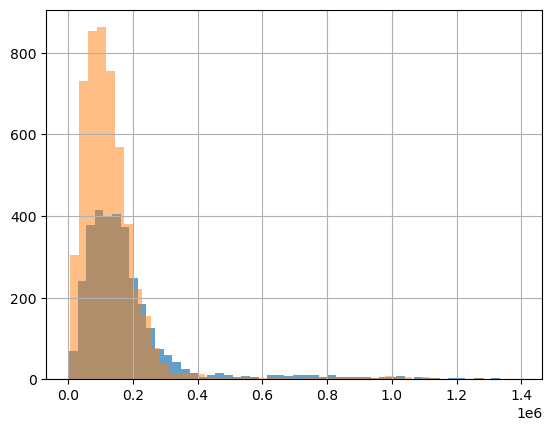

In [61]:
one_product = bank_scrooge.query('products == 1')['salary']
two_products = bank_scrooge.query('products == 2')['salary']

one_product.hist(bins=50, alpha=0.7)
two_products.hist(bins=50, alpha=0.5)

Полученные выборки велики и не зависят друг от друга. Применим t-тест для проверки гипотезы:

In [62]:
result = st.ttest_ind(one_product, two_products, equal_var=False)

alpha = .05

print('p-значение равно:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение равно: 1.204691176640354e-50
Отвергаем нулевую гипотезу


Следует отвергнуть нулевую гипотезу: средний доход клиентов, которые пользуются одним продуктом банка, отличается от среднего дохода клиентов, которые пользуются двумя или более продуктами банка.

#### Гипотеза о среднем возрасте клиентов

- Нулевая гипотеза: средний возраст клиентов, которые пользуются одним продуктом банка, не отличается от среднего возраста клиентов, которые пользуются двумя или более продуктами банка.
- Альтернативная гипотеза: средний возраст клиентов, которые пользуются одним продуктом банка, отличается от среднего возраста клиентов, которые пользуются двумя или более продуктами банка.

<AxesSubplot:>

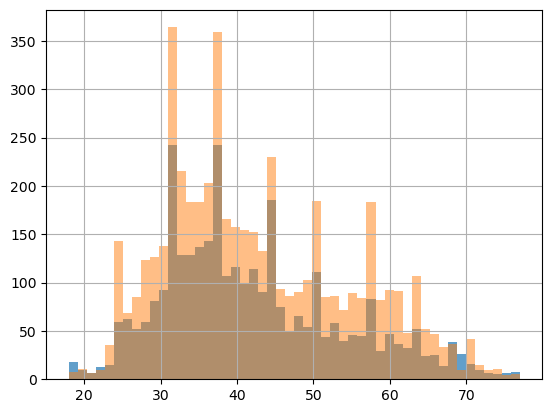

In [63]:
one_product = bank_scrooge.query('products == 1')['age']
two_products = bank_scrooge.query('products == 2')['age']

one_product.hist(bins=50, alpha=0.7)
two_products.hist(bins=50, alpha=0.5)

In [64]:
result = st.ttest_ind(one_product, two_products, equal_var=False)

alpha = .05

print('p-значение равно:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение равно: 0.012015480412551674
Отвергаем нулевую гипотезу


Следует отвергнуть нулевую гипотезу: средний возраст клиентов, которые пользуются одним продуктом банка, отличается от среднего возраста клиентов, которые пользуются двумя или более продуктами банка.

### Вывод и рекомендации

По результатам проведенного исследования можно сделать следующие ключевые выводы:

- Клиенты, которые пользовались более двух продуктов с большой вероятностью со временем уходят.
- БОльшая часть клиентов имеют не более двух используемых продуктов.
- В городе Ростов самый большой отток клиентов
- Лояльные клиенты чаще уходят
- Чаще всего уходят мужчины

**Сегментация клиентов банка:**

- В сегменте с одним продуктом: Доля клиентов в этом сегменте составляет 32,3%. Средний возраст клиентов составляет 35-49 лет. Кредитный рейтинг - от 820 до 920 баллов. Средняя зарплата клиента составляет 140 тысяч. Приблизительная оценка собственности клиента составляет от 0 до 7. Клиентами чаще всего являются мужчины. Активных клиентов немного больше, чем неактивных. Количество клиентов, у которых имеется кредитная карта, в 5 раз больше, чем тех, у кого ее нет. Отток клиентов составляет 9-10%, он является самым низким показателем среди всех сегментов.

- В сегменте с двумя продуктами: Доля клиентов в этом сегменте составляет 52,4%. Средний возраст клиентов составляет 35-52 года. Кредитный рейтинг - от 810 до 880 баллов. Средняя зарплата клиента составляет 120 тысяч. Приблизительная оценка собственности клиента составляет от 2 до 5. Клиентами чаще всего являются женщины. Активные клиенты преобладают. Количество клиентов, у которых имеется кредитная карта, почти вдвое больше, чем тех, у кого ее нет. Отток клиентов составляет 20%.

- В сегменте с тремя продуктами: Доля клиентов в этом сегменте составляет 10,5%. Средний возраст клиентов составляет 38-57 лет. Кредитный рейтинг - от 790 до 860 баллов. Средняя зарплата клиента составляет 120 тысяч. Приблизительная оценка собственности клиента составляет от 3 до 5. Клиентами чаще всего являются женщины. Неактивные клиенты преобладают. Количество клиентов, у которых имеется кредитная карта, меньше, чем тех, у кого ее нет. Отток клиентов составляет 35-40%.

- В сегменте с четырьмя продуктами: Доля клиентов в этом сегменте составляет 4,6%. Средний возраст клиентов составляет 33-45 лет. Кредитный рейтинг - от 850 до 900 баллов. Средняя зарплата клиента составляет 130-140 тысяч. Приблизительная оценка собственности клиента составляет от 3 до 5. Клиентами чаще всего являются мужчины. Активные клиенты преобладают. Количество клиентов, у которых имеется кредитная карта, в 1,5 раза больше, чем тех, у кого ее нет. Отток клиентов составляет 60-65%, он является самым худшим показателем среди всех сегментов.

- В сегменте с пятью продуктами: Доля клиентов в этом сегменте составляет 0,2%. Средний возраст клиентов составляет 31-40 лет. Кредитный рейтинг - от 850 до 870 баллов. Средняя зарплата клиента составляет 100 тысяч. Приблизительная оценка собственности клиента составляет от 3 до 5. Клиентами чаще всего являются мужчины. Активные клиенты преобладают. Количество клиентов, у которых имеется кредитная карта, немного больше, чем тех, у кого ее нет.

**Результаты проверки гипотез:**

- Средний доход клиента в сегменте с одним потребляемымм продуктом отличается от среднего дохода клиентов с двумя потребляемыми продуктами
- Средний возраст клиента в сегменте с одним потребляемымм продуктом отличается от среднего возраста клиентов с двумя потребляемыми продуктами

**Рекомендации:**

- Для клиентов из первого сегмента (с 1 продуктом): в этом сегменте отток клиентов минимальный. Важно отметить, что количество клиентов, у которых есть кредитная карта, превышает в 5 раз количество клиентов без кредитной карты. Можно предложить специальные условия для обладателей карт, чтобы повысить их интерес к продуктам банка.

- Для клиентов из второго сегмента (с 2 продуктами): этот сегмент объединяет в себе клиентов разных возрастов. Они имеют небольшой средний доход. Обратить внимание на то, что с увеличением количества продуктов до двух, процент оттока увеличился на 10 пунктов. Вероятно, причина может состоять в дополнительном продукте.

- Для клиентов из третьего сегмента (с 3 продуктами): отток клиентов для этого сегмента так же, как и для сегмента 4, является одним из худших. Необходимо выяснить причину, по которой клиенты уходят.

- Для клиентов из четвертого сегмента (с 4 продуктами): в данном сегменте показатель оттока клиентов является самым худшим среди всех сегментов, необходимо разобраться в причинах такого явления путем проведения детального анализа.

- Для клиентов из пятого сегмента (с 5 продуктами): в этом сегменте можно отметить, что клиенты являются самыми молодыми. Стоит подумать над разработкой продуктов для молодых людей с целью привлечения бОльшего количества клиентов.